## Astronomy 3350
### Autumn 2023
### Computational notebook 2

This is a _partially completed notebook_ with instructions for your second computational essay.  As discussed
in class on Wednesday, September 20, the goal is to analyze realistic artificial data on time-series photometry
of a star with a transiting exoplanet from the Nancy Grace Roman Space Telescope..

Instructions:
1. Solve each problem in order.  In many cases, there are code fragments which you can modify and adapt for your solutions.
2. Include good descriptions in Markdown cells of background, methods, and conclusions.
3. Upload your completed notebook (in __.ipynb__) format to Carmen.

There are 10 problems.  The problems are a combination of programming methods
and data analysis.  Each problem is worth 4 points.  Be sure to use the specified
method if the problem calls for it.  There is an 11th problem for extra credit.

This notebook makes use of the __Raw__ cell format, which contains codes or code fragments that are formatted as regular python but not executed when the notebook is run.  You can freely adapt these code bits or the ideas behind them.

The start of the submission window is 18:00 on Wednesday, October 18.  The submission window closes at 18:00 on Friday, October 20.

#### We begin by importing codes for plotting.

The syntax "import ... as ... " means we can abbreviate the plotting codes with __plt__ instead of using the full package name.

In [1]:
# Plotting codes
import matplotlib.pyplot as plt

### Modified plot format

The next two cells change the default settings for plots generated by
matplotlib.  This makes the plots larger and easier to read.

In [2]:
# Small dictionary with our selected changes.
style_revisions = { 
    'font.size' : 15,
    'figure.figsize' : [7.5, 5.5],
    'axes.linewidth': 1.5,
    'lines.linewidth' : 2.5,
    'xtick.top' : True,
    'ytick.right' : True, 
    'xtick.direction' : 'in',
    'ytick.direction' : 'in', 
    'xtick.major.size' : 11,
    'ytick.major.size' : 11, 
    'xtick.minor.size' : 5.5,
    'ytick.minor.size' : 5.5
}

In [3]:
# Update the matplotlib dictionary.
plt.rcParams.update(style_revisions)

### Problem 0

Create a Markdown cell with your name, email address, and any other information needed to identify you.  Use headers of various sizes as appropriate.

### Dasha Crocker
#### crocker.70@osu.edu

### Problem 1

The function below reads the first two columns in the data file and returns two lists,
one for each column.

- Modify the code so it returns 3 lists, one for each column of data.
- Insert a description of the function in the docstring, explaining how to run this function.
- Load the file and print the first _N_ values of each column, where _N_ is some reasonable number.  In doing this part, you will want the names of the lists you create to be meaningful.
- Modify the Markdown call before the function definition so it reflects your modified function.

In the example shown, with two lists returned, you would call it with something like:

    C1, C2 = get_data(filename)

When you want three things to be returned, in your fuction you would write

    return A, B, C
    
and you would call the function as

    C1, C2, C3 = get_data(filename)
    
You can verify your docstring is available by making a cell with:

    help(name of function)

It would be best to use informative names for the list objects.  The idea is that someone reading your code would know the meaning of the data as well as the form of the code.

#### File Reading Function

This function will read a file with three data columns into the Jupyter notebook. These data should be numbers (not labels etc), but non-numeric values can be commented out (ignored) using a # symbol, like code cells. The columns of data should be seperated using spaces. This notebook will use a text file that follows these guidelines. 

In [4]:
# Define a function to read two columns of data.

def get_data(fname):
    """
    This function takes one argument, the name of a file including its extension. 
    The output is three tuples, containing values from the file that is being read.
    
    To create this output, the function does the following:
    (1) creates three blank lists
    (2) opens the input file and reads the lines and parses them into units called words (don't need to be strings).
    (3) if there are words in the list and the line doesn't begin with a #, the function converts the words into floats.
    (4) adds the values from (3) into the lists created in (1).
    """

    # Create three blank lists.
    col1 = []
    col2 = []
    col3 = []
    
    # Make a list of all the lines in the file.  Each entry in the list
    # is one line.
    with open(fname, 'r') as f:
        lines = f.readlines()         # Load all the lines

        # For each line in the file...
        for each_line in lines:
            # Split the lines into words.
            words = each_line.split()
            
            # Turn each word into floats, ignoring the case when
            # a line begins with the comment character '%'.  The
            # test for a comment is when the first character in
            # the first word is '#'.  We also test for the case of
            # blank lines (number of words = 0).
            if len(words) > 0:
                if words[0][0] != '#':        # First character of first word
                    val1 = float(words[0])
                    val2 = float(words[1])
                    val3 = float(words[2])
                    col1.append(val1)
                    col2.append(val2)
                    col3.append(val3)

    # All done
    return col1, col2, col3

Now, I'll test my function by loading in the data and printing the first 5 values from the list.

In [25]:
JD, Kmag, Phase= get_data('data_planetX-1.txt') #load data

print('First 5 Julian Dates:', JD[:5])
print('First 5 K magnitudes:', Kmag[:5])
print('First 5 Phases:', Phase[:5])

First 5 Julian Dates: [2462493.22, 2462493.225235, 2462493.23047, 2462493.235705, 2462493.24094]
First 5 K magnitudes: [11.4737, 11.4454, 11.4731, 11.4789, 11.4762]
First 5 Phases: [0.0, 0.00056, 0.00112, 0.00168, 0.00224]


I've shown that my modified function works and these values all seem reasonable, so I'll use these lists in future computations.

### Problem 2

- Compute the amount of time between the first and last observation, in days.
- State how many points are in this data collection, using the len() function.
- The average time interval between points, expressed in seconds.
- Using the online [Julian Date Calculator](https://www.aavso.org/jd-calculator), determine the calendar dates over which these observations are imagined to take place.  You can use the first and last JD.

For the third part, you will compute the total time divided by $N - 1$, where $N$ is the number of points.  You will also need the number of seconds in a day.

This problem tests your use of list slicing, especially how to address the first and last element of a list.

For this problem, I'll be calculating important values for these data, specifically relating to the days when the data were collected. To find the duration of the observation, I can subtract the first observation from the last observation. To find the length of the list, I'll find use the length function. The average duration in days can be found by dividing the total duration by the number of observations minus one. To convert this result to seconds, I can multiply the result by 86400, the number of seconds in a day.

In [6]:
duration = JD[-1]-JD[0] #last obs-first obs
length=len(JD)
avg_int=duration/(length-1) *86400

#print results
print('duration of observations',round(duration,2))
print('number of observations', length)
print('average time between observations in seconds', round(avg_int,3))

duration of observations 81.09
number of observations 15492
average time between observations in seconds 452.3


Now, I need to calculate the calendar dates of these observations using the provided calculators. To do this, I'll call the first and last elements of the `JD` list to plug into the calculator.

In [7]:
print('First day:',JD[0])
print('Last day:',JD[-1])

First day: 2462493.22
Last day: 2462574.314664


According to the conversion calculator, the observations start on 12/22/2029 at 5:16:48 pm and end on 3/13/2030 at 7:33:06 pm. 

### Problem 3

Make a some plots and describe what you see.

- Plot the magnitude against Julian date.
- Plot the magnitude against the number of the observation (0, 1, 2...)

In each plot:
- Pick an [appropriate marker style](https://matplotlib.org/stable/api/markers_api.html) so the individual points don't overlap too much.
- Immediately below each plot, include a short description of each figure. Something like "K magnitude against Julian date".

The cell below shows a framework for making basic plots, including axis labels.

You should use the __ax.invert_yaxis()__ method to make bright magnitudes towards the top of your figure.

Text(0.5, 1.0, 'Brightness of Star (K magnitude) vs Time (Days)')

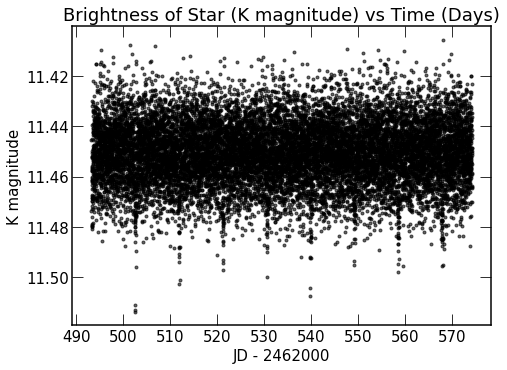

In [8]:
JD_adj=[x-2.462e6 for x in JD] #adjust dates to look pretty

fig, ax=plt.subplots()
ax.plot(JD_adj,Kmag,'.k', alpha=0.6) #plot data. 

ax.invert_yaxis()
ax.set_xlabel('JD - 2462000')
ax.set_ylabel('K magnitude')
ax.set_title('Brightness of Star (K magnitude) vs Time (Days)')

The plot above plots the K magnitude of the star against the Julian Date. By inspection, it seems that this star does not have a constant brightness, but rather has periodic dips in brightness.

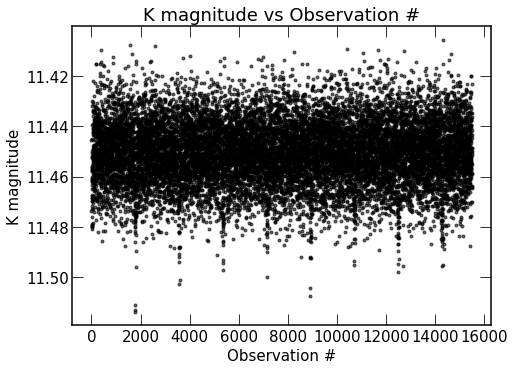

In [9]:
fig,ax=plt.subplots()
ax.plot(Kmag,'.k', alpha=0.6)

# Axis labels
ax.set_xlabel('Observation #')
ax.set_ylabel('K magnitude')
ax.set_title('K magnitude vs Observation #')
# If the Y data are magnitudes, we want to reverse the direction of the Y
# axis, so bright values are on top.
ax.invert_yaxis()

This graph plots K magnitude against observation number, starting from 0. Observations are not evenly distributed in time, so this plot won't look the same as the one above. 

For both plots, the star seems to have a periodic dip in brightness. I will assume this is caused by a transiting planet, since star spots would produce different data. I see 8 dips in brightness, meaning that the planet transits the star 8 times during these observations.

### Problem 4

Below are two functions to compute the average of the values on a list, provided that all the objects in the list
can be interpreted as a number.  

- Create a list, using a different name than the names of the lists that hold the stellar
data, with values with a known mean.  Then test each function to verify they return the expected value.
- Write a markdown cell for each function explaining how it works.  Make it _instructional_, as if you were giving guidance to an inexperienced programmer.

In [10]:
def fancy_mean(mylist):
    """
    Returns the mean value of data in a list. 

    Required argument: a python list.

    This function does no error checking, for example to verify that all the entries in the list are numbers.
    """
    val = sum(mylist) / len(mylist)
    return val
    
def stepwise_mean(mylist):
    """
    Returns the mean value of data in a list. 

    Required argument: a python list.

    This function does no error checking, for example to verify that
    all the entries in the list are numbers.
    """
    # Initialize accumulated sum.
    sum = 0.0
    
    # Initialize number of points
    npts = 0
    
    # For each item in the list ...
    for number in mylist:
        sum  = sum + number          # Accumulate sum
        npts = npts + 1

    # Compute the mean
    val = sum / npts
    return val

To make sure these functions work, I'll compute the average of the first 5 numbers with both functions.

In [28]:
test=[1,2,3,4,5]
print('using fancy_mean:', fancy_mean(test))
print('using stepwise_mean:', stepwise_mean(test))

using fancy_mean: 3.0
using stepwise_mean: 3.0


Now that I've shown these functions return the same value, I'll explain how they work. The first function uses the builtin `sum()` function to add the values in the list, then uses the `len()` function to find the length of the list, dividing the sum by this value to find the average. 

To operate this function, initialize a list with `mylist=[number1,number2,...]` and then run the function with `fancy_mean(mylist)`. 

The `stepwise_mean` function first starts by creating a counter and sum both equal to 0. For each value in the list, the function adds the number to a running sum until there are no items to tally. This results in a sum of the values in the list and the last index in the list, which is the length of the list. Dividing the sum by the length results in the average of the list. 

To run this function, initialize a list as before, then call the function with `stepwise_mean(mylist)`. Both functions should work on similiar python data types, like numpy arrays, although I won't use them for this notebook.

### Problem 5

Write a function to compute the standard deviation of the values on a list.  You can pattern
your function after one of the functions above which determines the mean. In your function, obtain
the mean by calling one of the functions defined earlier.

The standard deviation is the positive square root of the variance $\sigma^2$, defined as

$$
\sigma^2 = \frac{1}{N}\sum(x - \langle x\rangle)^2,
$$

where the $x$ are the data values, $N$ is the number of points and $\langle x\rangle$ is the average value.
Here we are using the _population variance_, which has $N$ in the denominator.  The _sample variance_, discussed
in class, uses $N - 1$.  Your functions should compute the population variance.

If you want to take advantage of the builtin function __sum()__ or your average function
then you could implement the variance as

$$
\sigma^2 = \langle x^2 \rangle - (\langle x\rangle)^2
$$

This is the average of the _squares_ of x minus the square of the average of x.  If you go this
route, then you should use a list comprehension to generate a list of the squares of the data
values. Do that internally in your function.

Test your functions by verifying that the standard deviation of a list

     Testdat = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

has the value $\sigma = 2.87$.  You don't have to get this exact value, but you should get close.

Here, I'll write a function to find the standard deviation using the definition $\sigma^2 = \langle x^2\rangle - \langle x\rangle ^2$. I will do this using list comprehensions.

In [12]:
def sigma(mylist):
    """
    Requires a list as an input. Computes the average of the squares and the square of the average, and subtracts them.
    Output is variance.
    """
    
    length=len(mylist)
    squares=[x**2 for x in mylist]
    
    #compute averages
    avg_squares=sum(squares)/length
    avg_ylist=sum(mylist)/length
    
    #find variance
    variance=avg_squares-(avg_ylist)**2
    
    return variance**0.5 

Now, I need to test my function. Since I'm given a list and the standard deviation for it, I can test the function by applying it to the list, since I know the expected standard deviation

In [29]:
test_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Sigma=sigma(test_list)
print('I ixpect sigma to be 2.87 and it is', round(Sigma,2))

I ixpect sigma to be 2.87 and it is 2.87


### Problem 6

Compute and report the mean and standard deviation of the observed magnitude for:
- the entire sample
- the first 50 points
- points with position in the list from 1700 to 1800 inclusive
- the whole sample but every 100th point

This is an exercise in list slicing and addressing.

I'll use the `fancy_mean` and `sigma` functions to find the mean and standard deviations of the requested intervals.

In [14]:
#whole sample
tot_mean=fancy_mean(Kmag)
tot_dev=sigma(Kmag)
print('mean of sample:',round(tot_mean,3))
print('standard deviation of sample:',round(tot_dev,3))
print('')
#first 50
fifty_mean=fancy_mean(Kmag[0:50])
fifty_dev=sigma(Kmag[0:50])
print('mean of first 50 points:', round(fifty_mean,3))
print('standard deviation of first 50 points:',round(fifty_dev,3))
print('')
#1700 to 1800
rand=Kmag[1700:1801]
rand_mean=fancy_mean(rand)
rand_dev=sigma(rand)
print('mean of 1700 to 1800:', round(rand_mean,3))
print('standard deviation of 1700 to 1800:',round(rand_dev,3))
print('')
#every 100th point
rand100=Kmag[::100]
rand100_mean=fancy_mean(rand100)
rand100_dev=sigma(rand100)
print('mean of every 100th point:', round(rand100_mean,3))
print('standard deviation of every 100th point',round(rand100_dev,3))

mean of sample: 11.451
standard deviation of sample: 0.013

mean of first 50 points: 11.46
standard deviation of first 50 points: 0.014

mean of 1700 to 1800: 11.461
standard deviation of 1700 to 1800: 0.017

mean of every 100th point: 11.451
standard deviation of every 100th point 0.012


### Problem 7

Make a plot showing magnitude against Julian date where the x-range is restricted to run from
the start of the data sequence to somewhat beyond the first transit.  Show that you get the 
same plot if you restrict the range of x shown in two ways:
- plotting the full data set, but using the __ax.set_xlim()__ method to put limits on the x-axis.
- delivering slices of the data lists using __X[start:stop]__ and __Y[start:stop]__, where the starting and ending indices are something you chose in this problem.

Based on my previous plots, I estimate that the transit happens at roughly 502 on the x-axis. I'll plot it again and cut off data past 505 on the x-axis. The ax.set_xlim() method is a good way to quickly visualize data, but indexing will result in data that can be used in future calculations.

Text(0.5, 1.0, 'Brightness of Star (K magnitude) vs Time (Days)')

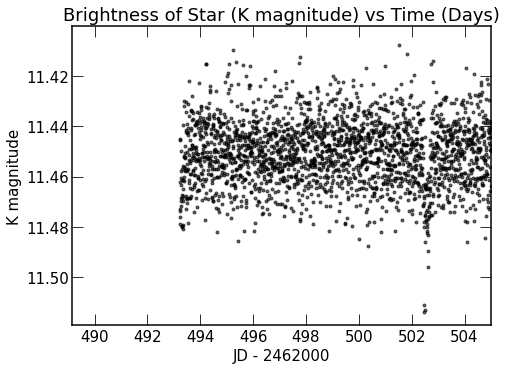

In [15]:
#setting x limits
fig, ax=plt.subplots()
ax.plot(JD_adj,Kmag,'.k', alpha=0.6) #plot data. 

ax.invert_yaxis()
ax.set_xlabel('JD - 2462000')
ax.set_xlim(right=505)
ax.set_ylabel('K magnitude')
ax.set_title('Brightness of Star (K magnitude) vs Time (Days)')

Text(0.5, 1.0, 'Brightness of Star (K magnitude) vs Time (Days)')

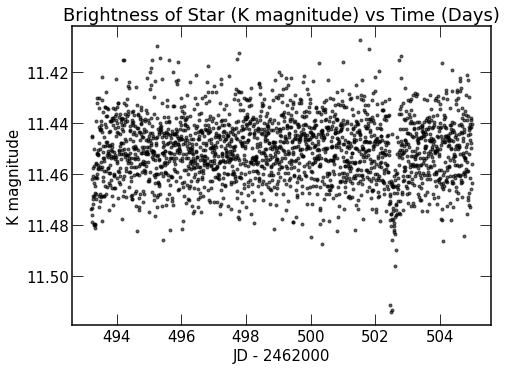

In [16]:
J=JD[:2250]
J_adj=[x-2462000 for x in J]

fig, ax=plt.subplots()
ax.plot(J_adj,Kmag[:2250],'.k', alpha=0.6) #plot data. 

ax.invert_yaxis()
ax.set_xlabel('JD - 2462000')
ax.set_ylabel('K magnitude')
ax.set_title('Brightness of Star (K magnitude) vs Time (Days)')

It's easier to plot the data using the set_xlim method, but I now have a list of data that I need for future calculations.

### Problem 8

Make a plot showing the region around one selected transit.  Plot list position
on the X-axis and magnitude on the Y-axis.  Using list slicing:
- specify which points you judge are during the transit.
- compute the mean magnitude, standard deviation, and standard error of the mean for points during the transit.
- compute the difference in magnitude between the non-transit brightness and the brightness during this one selected transit.  You can use the average of the whole sample as your measure of the non-transit brightness, since the fraction of the time spent during the transit is small.  This difference in magnitude is called the _transit depth_.
- Using the same slices of the list, plot magnitude against Julian date.  Estimate the duration of the transit in hours.

I'm going to make a plot of the transit around observation 3600. I judge the transit to occur between observation 3547 and 3590, as denoted by blue points on the graph.

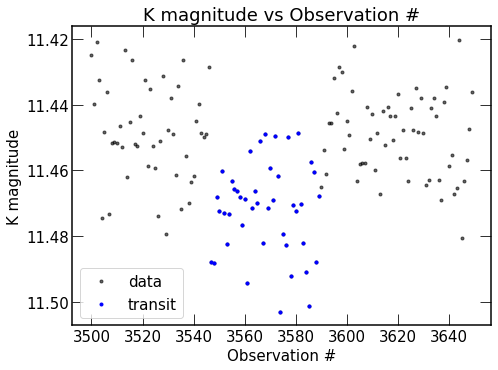

In [17]:
fig,ax=plt.subplots()
transit_mag=Kmag[3500:3650]
transit_index=[x for x in range(3500,3650)]
ax.plot(transit_index,transit_mag,'.k', alpha=0.6, label='data')

# Axis labels
ax.set_xlabel('Observation #')
ax.set_ylabel('K magnitude')
ax.set_title('K magnitude vs Observation #')
ax.invert_yaxis()

#transit points
dip_mag=Kmag[3547:3590]
dip_index=[x for x in range(3547,3590)]
ax.plot(dip_index,dip_mag,'.b', label='transit')
ax.legend()

Now, I'll find the mean, standard deviation and standard error of the mean ($\frac{\sigma}{\sqrt{N}}$) for the points during the transit. I'll compute the transit depth by subtracting the average brightness during the transit from the average brightness of the sample. This can be used because transits only occur for a small fraction of the data.

In [18]:
dip_avg=fancy_mean(dip_mag) #mean
dip_sigma=sigma(dip_mag) #standard deviation
dip_sem=dip_sigma/(len(dip_mag)**0.5) #standard error of the mean
depth=abs(tot_mean-dip_avg) #transit depth

#print results
print('average brightness during transit:', round(dip_avg,3))
print('standard deviation during transit:',round(dip_sigma,3))
print('standard error of the mean during transit:', round(dip_sem,3))
print('transit depth:', round(depth,3))

average brightness during transit: 11.472
standard deviation during transit: 0.014
standard error of the mean during transit: 0.002
transit depth: 0.021


I took the absolute value of the transit depth because the magnitude of this number is what's physically important. Now that I've found the requested values, I'll plot this data against the Julian date so that I can find the duration in hours.

duration of transit in hours: 5.28


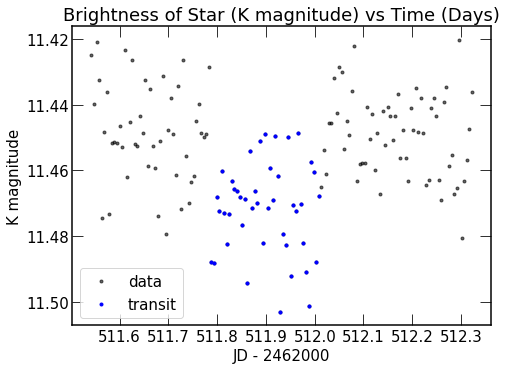

In [19]:
JD_transit=JD_adj[3500:3650]
fig, ax=plt.subplots()
ax.plot(JD_transit,transit_mag,'.k', alpha=0.6, label='data') #plot data. 

ax.invert_yaxis()
ax.set_xlabel('JD - 2462000')
ax.set_ylabel('K magnitude')
ax.set_title('Brightness of Star (K magnitude) vs Time (Days)')

#transit points
dip_mag=Kmag[3547:3590]
dip_JD=JD_adj[3547:3590]
ax.plot(dip_JD,dip_mag,'.b', label='transit')
ax.legend()

#find duration
duration= (dip_JD[-1]-dip_JD[0])*24 #multiply by 24 to get hours
print('duration of transit in hours:', round(duration,2))

The planit takes roughly 5.28 hours to transit the star. I found this by indexing the first and last element of the points in the transit for the Julian Date. Subtracting these resulted in a value in units of days, which I converted to hours by multiplying by 24. 

### Problem 9

Make a plot of the full light curve against phase $\phi$, and compute the transit depth for all the data together.
- First pull out all points that are within some phase interval $\Delta\phi$ of zero.  You specify the value of the phase interval by inspection of your plot. Use the code fragment below as a template.
- Using just those points, compute the transit depth (in magnitudes) and its error.  The error you want is the standard error of the mean.
- The error of the transit depth should be smaller than for a single eclipse by a factor that is roughly $\surd M$, where $M$ is the number of transits in the whold data sample.  Is this approximately what you get?

Here, I will plot all transits on top of each other and select points during the transit. This will be done using the `Phase` list, which assigns a phase to each observation based on its distance from the transit, with values ranging from -0.5 to 0.5. I will select transits by visual inspection. 

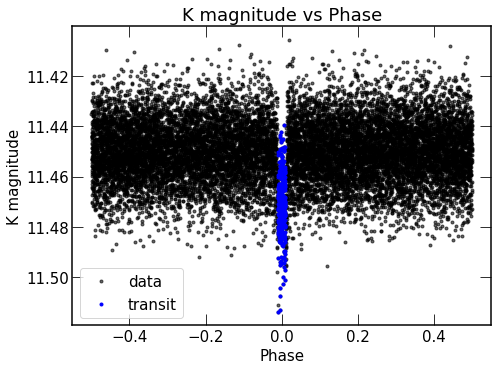

In [20]:
#plot
fig, ax=plt.subplots()
ax.plot(Phase, Kmag,'.k', alpha=0.6, label='data')
ax.set_xlabel('Phase')
ax.set_ylabel('K magnitude')
ax.set_title('K magnitude vs Phase')


Values = []  

# Specify the range included
dphase = 0.01        # Select this yourself

# For each index in the phases list...
for k in range(len(Phase)):
    # Add value to list if phase is in selected range.
    if abs(Phase[k]) <= dphase:
         Values.append(Phase[k])

#get magnitudes
mags=[]

for k in range(len(Phase)):
    # Add value to list if phase is in selected range.
    if abs(Phase[k]) <= dphase:
         mags.append(Kmag[k])
ax.plot(Values,mags, '.b', label='transit')
ax.legend()
ax.invert_yaxis()

The transit appears to take place between phases -0.01 and 0.01. Now, I'll use these selected data to find the average transit depth, and the standard error of the mean for these data.

In [21]:
avg_dip=fancy_mean(mags) #average of transit point
avg_depth=abs(tot_mean-avg_dip) #transit depth
avg_sem=sigma(mags)/len(mags)**0.5 #standard error of the mean

#print results
print('transit depth of all transits:', round(avg_depth,4))
print('standard error of the mean for all transits:',round(avg_sem,4))

transit depth of all transits: 0.0205
standard error of the mean for all transits: 0.0007


According to statistics theory, the standard error of the mean for all transits approximately equals the standard error of the mean for one transit divided by the number of transits. I'll check that this is true.

In [22]:
num_dip=8 #number of transits
avg_sem_pred=dip_sem/(num_dip**0.5) #predicted standard error of mean
ratio=avg_sem_pred/avg_sem

#print
print('predicted standard error of mean:', round(avg_sem_pred,4))
print('ratio between predicted and calculated standard error of the mean:',round(ratio,4))

predicted standard error of mean: 0.0007
ratio between predicted and calculated standard error of the mean: 1.0257


As expected, both standard errors of the mean are roughly equal. Sources of error include the fact that the transits weren't defined the same way and randomness in all measurements.

### Problem 10

For small magnitude changes, a difference of 0.01 magnitudes corresponds to a change of
brightness of 1%.  Thus if you measure a transit depth of (say) 0.03 magnitudes, then 3% of
the star's light is blocked during the transit.

- Explain why the transit depth informs you about the square of the ratio of the planet radius to the radius of the star.
- Using the result from Problem 9, and assuming the star we're measuring is like the Sun, tell us whether this is a small planet like the Earth or a big planet like Jupiter.

The transit model assumes that the dimming of a star is caused by a planet passing between us and its host star. Since the planet gives off no light of its own, it will dim the star by the amount of area it blocks when it transits. This can be expressed as: $$D\approx \frac{\pi r_p^2}{\pi R_*^2}= \left(\frac{r_p}{R_*}\right)^2$$ $D$ is transit depth, $r_p$ and $R_*$ are the radii of the planet and star, respectively. The area blocked by the planet will be proportional to its radius squared. Magnitudes measure the ratio of brightnesses, so it makes sense to think of the star as being X% dimmer than emitting Y fewer photons during the transit. 

To find the radius of the planet, assuming this is a Sunlike star, I'll multiply both sides of my equation by $R_*^2$ and take a square root:$$r_p=\sqrt{D\cdot R_*^2}$$ Now I'll be able to find the radius of the planet. According to [this link](https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html), the Sun's radius is 695,700 km. [This link](https://nssdc.gsfc.nasa.gov/planetary/factsheet/index.html) gives Jupiter's diameter as 142,984 km.

In [23]:
R_sun=695000 #km
r_p=(avg_depth*R_sun**2)**0.5 #km
r_j=142984/2 # Diameter/2 = radius. units are km
print('This planet is', round(r_p/r_j,2),'Jupiter radii')

This planet is 1.39 Jupiter radii


Based on my calculations, assuming this is a sunlike star, the transiting planet is Jupiter-like.

### Problem 11 - bonus problem

This is worth an additional 5 points.

Compute the orbital period of this star.  You could do this by making a list of those Julian dates where the phase
changes from a small negative value to a small positive value.  The 'small' means you are looking at points near 
$\phi = 0$.  Make a list of the times where this happens, or more specifically the difference in time between
one transit and the previous transit.